In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [ ]:
df = pd.read_csv("restaurant_customer_satisfaction.csv")


## 1.Answer the following questions:

#### **a.**   Is Age correlated significantly with Average Spend?

ans:- No

In [ ]:
x = df[['Age', 'AverageSpend']].corr()
x

,Age,AverageSpend
Age,1.000000,0.017765
AverageSpend,0.017765,1.000000


<Axes: >

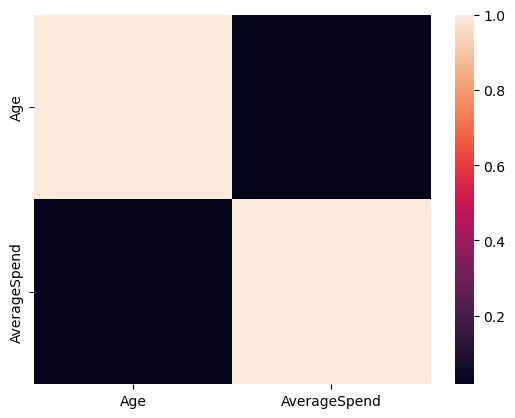

In [ ]:
sns.heatmap(x)

#### b. Calculate the mean average spending for both the genders separately.

ans: Female    105.471643
     
Male      105.850916

In [ ]:
df.groupby('Gender')['AverageSpend'].mean()

Gender
Female    105.471643
Male      105.850916
Name: AverageSpend, dtype: float64

#### c.  Calculate the mean of Age for all the categories of Time of Visit separately.

ans: 
     Breakfast  :-  43.559289
     
Dinner    :-   43.500000     
Lunch    :-    44.432271

In [ ]:
df.groupby('TimeOfVisit')['Age'].mean()

TimeOfVisit
Breakfast    43.559289
Dinner       43.500000
Lunch        44.432271
Name: Age, dtype: float64

#### d.Among the people rarely visiting, what is the most preferred cuisine by percentage?
ans:- The most preferred cuisine among rare visitors is 'Italian' with 29.07% preference.

In [ ]:
# Filter for people who visit rarely
rare_visitors = df[df['VisitFrequency'] == 'Rarely']

# Calculate the percentage of each preferred cuisine within the "Rarely" group
cuisine_counts = rare_visitors['PreferredCuisine'].value_counts(normalize=True) * 100

# Find the most preferred cuisine by percentage
most_preferred_cuisine = cuisine_counts.idxmax()
most_preferred_percentage = cuisine_counts.max()

print(f"The most preferred cuisine among rare visitors is '{most_preferred_cuisine}' with {most_preferred_percentage:.2f}% preference.")


The most preferred cuisine among rare visitors is 'Italian' with 29.07% preference.


#### e.Among the people weekly visiting, what is the most frequent meal type?

ans = The most frequent meal type ampng weekly visitors is 'Takeaway'

In [ ]:
weekly_visitors = df[df['VisitFrequency'] == 'Weekly']

In [ ]:
mealtype_counts = weekly_visitors['MealType'].value_counts()
print(f"The most frequent meal type ampng weekly visitors is '{mealtype_counts.idxmax()}'")

The most frequent meal type ampng weekly visitors is 'Takeaway'


#### f.  Among the business type of dining occasion, what is most frequent preferred cuisine?

ans = The most preferred cuisine among business dining occasion is 'Italian' preference.


In [ ]:
business_DiningOccasion = df[df['DiningOccasion'] == 'Business']
cousine_counts = business_DiningOccasion['PreferredCuisine'].value_counts()
most_preferred_cuisine = cousine_counts.idxmax()
print(f"The most preferred cuisine among business dining occasion is '{most_preferred_cuisine}' preference.")

The most preferred cuisine among business dining occasion is 'Italian' preference.


#### g.With the group size bigger than 5, what is percentage of business type of dining occasion?
ans : for group size greater than 5 the percentage of business type of dining occasion is 33.33333333333333

In [ ]:
df_temp = df[df['GroupSize']>5]
value = df_temp['DiningOccasion'].value_counts(normalize = True) * 100
print(f"for group size greater than 5 the percentage of business type of dining occasion is {value['Business']}")

for group size greater than 5 the percentage of business type of dining occasion is 33.33333333333333


#### h. Among the customers preferring Chinese cuisine, how much percentage are satisfied?
 ans : The customers preferring Chinese cuisine, `13.55` percentage are satisfied

In [ ]:
chinese_cous = df[df['PreferredCuisine'] == 'Chinese']
value = chinese_cous['HighSatisfaction'].value_counts(normalize = True)* 100
print(f"The customers preferring Chinese cuisine, {value[1]:.2f} percentage are satisfied")

The customers preferring Chinese cuisine, 13.55 percentage are satisfied


In [ ]:
value[1]

13.548387096774196

In [ ]:
 print(f"the customers preferring Chinese cuisine, {value[1]:.2f} percentage are satisfied")

the customers preferring Chinese cuisine, 13.55 percentage are satisfied


#### i. What is average rating given to the food by the customers preferring Chinese cuisine?
 ans: the average rating given by the customer preffering chinese cuisine is  3.05

In [ ]:
df['Average Rating'] = df[['ServiceRating', 'FoodRating', 'AmbianceRating']].mean(axis = 1)

In [ ]:
avg_rat = df[df['PreferredCuisine'] == 'Chinese']['Average Rating'].mean()
print(f"the average rating given by the customer preffering chinese cuisine is {avg_rat: .2f}")

the average rating given by the customer preffering chinese cuisine is  3.05


#### j.For the customers preferring Chinese cuisine, how much is the average waiting time?
ans: The average waiting time for customer for customer who opted for chinese cuisine is  29.52 Minutes


In [ ]:
df.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction,Average Rating
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0,3.666667
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0,4.333333
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0,4.000000
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0,3.333333
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0,3.333333


In [ ]:
chinese_cousine_avg_time = df[df['PreferredCuisine'] == 'Chinese']['WaitTime'].mean()
print(f"The average waiting time for customer for customer who opted for chinese cuisine is {chinese_cousine_avg_time: .2f} Minutes")

The average waiting time for customer for customer who opted for chinese cuisine is  29.52 Minutes


## 2.Do the following considering encoded HighSatisfaction as response(dependent) variable:

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [ ]:
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)
ct = make_column_transformer(('passthrough', make_column_selector(dtype_exclude = object)), (ohe, make_column_selector(dtype_include = object))).set_output(transform = 'pandas')

#### a.Do the hot encoding / dummying of all the non-numeric variables

In [ ]:
df_num = ct.fit_transform(df)

In [ ]:
y = df_num['passthrough__HighSatisfaction']
X = df_num.drop('passthrough__HighSatisfaction', axis =1)

#### Considering the Grid Search CV / Randomized Search CV with parameters of your choice, test the accuracy on following model

In [ ]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True)

##### i. SVC (kernel=’linear’)
best score: -0.2627

In [ ]:
svml = SVC(kernel = 'linear', probability = True)
pipe = Pipeline([('SCL', MinMaxScaler()), ('SVM', svml)])

In [ ]:
param = {'SVM__C': np.logspace(-3, 2, 6)}

In [ ]:
gcv = GridSearchCV(pipe, param_grid = param, scoring = 'neg_log_loss', verbose = 2, cv = kfold)
gcv.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .......................................SVM__C=0.001; total time=   0.0s
[CV] END .......................................SVM__C=0.001; total time=   0.0s
[CV] END .......................................SVM__C=0.001; total time=   0.0s
[CV] END .......................................SVM__C=0.001; total time=   0.0s
[CV] END .......................................SVM__C=0.001; total time=   0.0s
[CV] END ........................................SVM__C=0.01; total time=   0.0s
[CV] END ........................................SVM__C=0.01; total time=   0.0s
[CV] END ........................................SVM__C=0.01; total time=   0.1s
[CV] END ........................................SVM__C=0.01; total time=   0.0s
[CV] END ........................................SVM__C=0.01; total time=   0.0s
[CV] END .........................................SVM__C=0.1; total time=   0.1s
[CV] END ........................................

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('SCL', MinMaxScaler()),
                                       ('SVM',
                                        SVC(kernel='linear',
                                            probability=True))]),
             param_grid={'SVM__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='neg_log_loss', verbose=2)

In [ ]:
gcv.best_score_

-0.2627427610208589

##### ii.SVC (kernel=’rbf’)
best score:- -0.2567

In [ ]:
svmr = SVC(kernel = 'rbf', probability = True)
pipe1 = Pipeline([('SCL', MinMaxScaler()), ('SVM', svmr)])
param = {'SVM__C': np.logspace(-3, 3, 7), 'SVM__degree': [2, 3, 4, 5]  }
gcv1 = GridSearchCV(pipe1, param_grid = param, scoring = 'neg_log_loss', verbose = 2, cv = kfold)
gcv1.fit(X,y)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END ........................SVM__C=0.001, SVM__degree=2; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=2; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=2; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=2; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=2; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=3; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=3; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=3; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=3; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=3; total time=   0.1s
[CV] END ........................SVM__C=0.001, SVM__degree=4; total time=   0.1s
[CV] END ........................SVM__C=0.001, 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('SCL', MinMaxScaler()),
                                       ('SVM', SVC(probability=True))]),
             param_grid={'SVM__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'SVM__degree': [2, 3, 4, 5]},
             scoring='neg_log_loss', verbose=2)

In [ ]:
gcv1.best_params_

{'SVM__C': 0.1, 'SVM__degree': 5}

In [ ]:
gcv1.best_score_

-0.25676517811975336

##### iii.Decision Tree Classifier
best score :- -0.4102

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
params= {'min_samples_split':[2,10, 15, 50], 'min_samples_leaf': [1,10,25,50], 'max_depth':[None, 4, 6]}
gcv2 = GridSearchCV(dtc, param_grid = params, scoring = 'neg_log_loss', verbose = 2, cv = kfold)

In [ ]:
gcv2.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=15; total time=   0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 10, 25, 50],
                         'min_samples_split': [2, 10, 15, 50]},
             scoring='neg_log_loss', verbose=2)

In [ ]:
gcv2.best_score_

-0.41025433173164494

In [ ]:
gcv2.best_params_

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 50}

##### iv.Random Forest Classifier
score:- -0.2528

In [ ]:
rf = RandomForestClassifier()
params = {'n_estimators': [50, 100, 200, 500], 
    'max_depth': [None, 3, 5, 10, 20], 
    'min_samples_split': [2, 5, 10, 20],   
    'min_samples_leaf': [1, 5, 10, 20],   
    'max_features': ['auto', 'sqrt', 'log2'],            
    'bootstrap': [True, False]
         }
gcv3 = GridSearchCV(rf, param_grid = params, cv = kfold, verbose = 2, scoring = 'neg_log_loss')
gcv3.fit(X, y)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimator

C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3200 fits failed out of a total of 9600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\DAI.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _valid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='neg_log_loss', verbose=2)

In [ ]:
gcv3.best_score_, gcv3.best_params_

(-0.2528166595533478,
 {'bootstrap': False,
  'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 500})

## best score is :
- `-0.2528` using `Random forest` with paramters `{'bootstrap': False,'max_depth': None,'max_features': 'log2','min_samples_leaf': 1,'min_samples_split':2,'n_estimators': 500}`
- followed closely by `SVC('rbf')` with score `-0.2567`